<center>
    <img src="https://github.com/Haris2143/TugasAI-BigData/blob/main/img/scikit-learn-logo.png?raw=1" width="40%" />
    <br />
    <h1>An introduction to Scikit-Learn</h1>
    <br /><br />
    Gilles Louppe (<a href="https://twitter.com/glouppe">@glouppe</a>)
    <br /><br />
    New York University
</center>

## Prerequisites

In [ ]:
# This is an Jupyter notebook, with executable Python code inside
1764 ** 0.5

42.0

Materials are all available on  <a href="https://github.com/glouppe/lectures-iccub-2016">GitHub</a>.

Examples require a Python distribution with scientific packages:

1. Jump to https://www.continuum.io/downloads and download the installer.

2. `bash Anaconda2-4.2.0-Linux-x86_64.sh` (or whatever installer you picked)

3. `conda install scikit-learn numpy scipy matplotlib jupyter pandas`

4. You are ready to go!

    

In [ ]:
# Global imports and settings

# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.max_open_warning"] = -1

# Print options
import numpy as np
np.set_printoptions(precision=3)

# Slideshow
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {'width': 1440, 'height': 768, 'scroll': True, 'theme': 'simple'})

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

In [ ]:
%%javascript
Reveal.addEventListener("slidechanged", function(event){ window.location.hash = "header"; });

<IPython.core.display.Javascript object>

# Outline

* Scikit-Learn and the scientific ecosystem in Python
* Supervised learning
* Transformers, pipelines and feature unions
* Beyond building classifiers
* Summary

# Scikit-Learn

## Overview

* Machine learning library written in __Python__
* __Simple and efficient__, for both experts and non-experts
* Classical, __well-established machine learning algorithms__
* Shipped with <a href="http://scikit-learn.org/dev/documentation.html">documentation</a> and <a href="http://scikit-learn.org/dev/auto_examples/index.html">examples</a>
* __BSD 3 license__

## Community driven development

- 20~ core developers (mostly researchers)
- 700+ occasional contributors
- __All working publicly together__ on [GitHub](https://github.com/scikit-learn/scikit-learn)
- Emphasis on __keeping the project maintainable__
    - Style consistency
    - Unit-test coverage
    - Documentation and examples
    - Code review
- Join us!

## Python stack for data analysis

The __open source__ Python ecosystem provides __a standalone, versatile and powerful scientific working environment__, including: [NumPy](http://numpy.org), [SciPy](http://scipy.org), [Jupyter](http://jupyter.org) [Matplotlib](http://matplotlib.org), [Pandas](http://pandas.pydata.org/), _and many others..._

<center>
<img src="https://github.com/Haris2143/TugasAI-BigData/blob/main/img/ecosystem.png?raw=1" style="max-width: 60%; display: inline" />
</center>



- Scikit-Learn builds upon NumPy and SciPy and __complements__ this scientific environment with machine learning algorithms;
- By design, Scikit-Learn is __non-intrusive__, easy to use and easy to combine with other libraries;
- Core algorithms are implemented in low-level languages.

## Algorithms

__Supervised learning:__

* Linear models (Ridge, Lasso, Elastic Net, ...)
* Support Vector Machines
* Tree-based methods (Random Forests, Bagging, GBRT, ...)
* Nearest neighbors
* Neural networks
* Gaussian Processes
* Feature selection

__Unsupervised learning:__

* Clustering (KMeans, Ward, ...)
* Matrix decomposition (PCA, ICA, ...)
* Density estimation
* Outlier detection

__Model selection and evaluation:__

* Cross-validation
* Grid-search
* Lots of metrics

_... and many more!_ (See our [Reference](http://scikit-learn.org/dev/modules/classes.html))

# Supervised learning

## Problem statement

<center>
    <img src="https://github.com/Haris2143/TugasAI-BigData/blob/main/img/problem.png?raw=1" />
    Classification vs. regression
</center>

## Framework

Data comes as a finite learning set ${\cal L} = (X, y)$ where
* Input samples are given as an array $X$ of shape (`n_samples` $\times$ `n_features`), taking their values in ${\cal X}$;
* (Classification) Output values are given as an array $y$, taking _symbolic_ values in ${\cal Y}$.
* (Regression) Output values are given as an array $y$, taking _real_ values in ${\cal Y}$.

The goal of supervised classification is to build an estimator $f: {\cal X} \mapsto {\cal Y}$.


<center>
<img src="https://github.com/Haris2143/TugasAI-BigData/blob/main/img/f.png?raw=1" style="max-width: 80%; display: inline" />
</center>

We are not interested in just any function $f$.

We are looking for

$$
f^* = \arg \min_f Err(f) = \mathbb{E}_{X,Y}[ L(Y, f(X)) ]
$$

where $L$ is a loss function, e.g.,
- the zero-one loss  $L(Y,\hat{Y}) = 1(Y \neq \hat{Y})$ for classification;
- the squared error $L(Y,\hat{Y}) = (Y-\hat{Y})^2$ for regression.

## Applications

- Classifying signal from background events;
- Diagnosing disease from symptoms;
- Recognising cats in pictures;
- Identifying body parts with cameras;
- Predicting temperature for the next days;
- ...
  

## Data

- Input data = Numpy arrays or Scipy sparse matrices ;
- Algorithms are expressed using high-level operations defined on matrices or vectors (similar to MATLAB) ;
    - Leverage efficient low-leverage implementations ;
    - Keep code short and readable.

In [ ]:
# Generate data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=20, random_state=123)
labels = ["b", "r"]
y = np.take(labels, (y < 10))
print(X[:5])
print(y[:5])

[[-2.956 -3.749]
 [-7.586  2.066]
 [ 0.457  8.059]
 [-5.996  2.021]
 [-0.979 -9.781]]
['b' 'r' 'b' 'b' 'r']


In [ ]:
# X is a 2 dimensional array, with 300 rows and 2 columns
print(X.shape)

# y is a vector of 300 elements
print(y.shape)

(300, 2)
(300,)


In [ ]:
# Rows and columns can be accessed with lists, slices or masks
print(X[[1, 2, 3]])     # rows 1, 2 and 3
print(X[:5])            # 5 first rows
print(X[200:210, 0])    # values from row 200 to row 210 at column 0
print(X[y == "b"][:5])  # 5 first rows for which y is "b"

[[-7.586  2.066]
 [ 0.457  8.059]
 [-5.996  2.021]]
[[-2.956 -3.749]
 [-7.586  2.066]
 [ 0.457  8.059]
 [-5.996  2.021]
 [-0.979 -9.781]]
[ -1.448  -6.3    -6.195  -1.99   -3.411  -7.009   5.402  -4.995  10.883
  -6.661]
[[-2.956 -3.749]
 [ 0.457  8.059]
 [-5.996  2.021]
 [-4.021 -5.173]
 [ 4.01   2.581]]


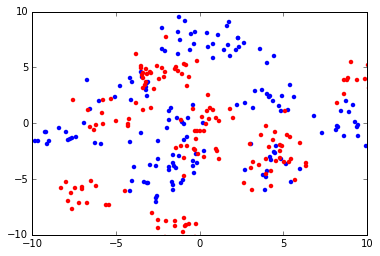

In [ ]:
# Plot
for label in labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=label, linewidths=0)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

## A simple and unified API

All learning algorithms in scikit-learn share a uniform and limited API consisting of complementary interfaces:

- an `estimator` interface for building and fitting models;
- a `predictor` interface for making predictions;
- a `transformer` interface for converting data.

Goal: enforce a simple and consistent API to __make it trivial to swap or plug algorithms__.

<center>
        <img src="https://github.com/Haris2143/TugasAI-BigData/blob/main/img/supervised_scikit_learn.png?raw=1" style="max-width: 80%; display: inline" /><br />
</center>

### Estimators

In [ ]:
class Estimator(object):
    def fit(self, X, y=None):
        """Fits estimator to data."""
        # set state of ``self``
        # ...
        return self

In [ ]:
# Import the nearest neighbor class
from sklearn.neighbors import KNeighborsClassifier  # Change this to try
                                                    # something else

# Set hyper-parameters, for controlling algorithm
clf = KNeighborsClassifier(n_neighbors=5)

# Learn a model from training data
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
# Estimator state is stored in instance attributes
clf._tree

### Predictors

In [ ]:
# Make predictions
print(clf.predict(X[:5]))

['b' 'r' 'b' 'b' 'r']


In [ ]:
# Compute (approximate) class probabilities
print(clf.predict_proba(X[:5]))

[[ 1.   0. ]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 0.6  0.4]
 [ 0.   1. ]]


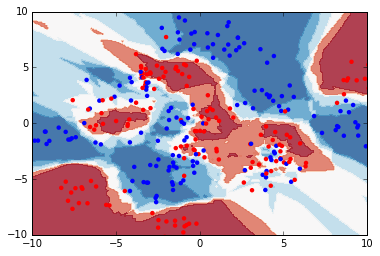

In [ ]:
from tutorial import plot_surface
plot_surface(clf, X, y)

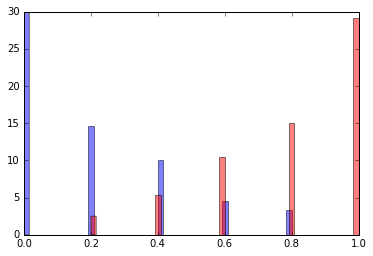

In [ ]:
from tutorial import plot_histogram
plot_histogram(clf, X, y)

## Classifier zoo

### Decision trees

Idea: greedily build a partition of the input space using cuts orthogonal to feature axes.

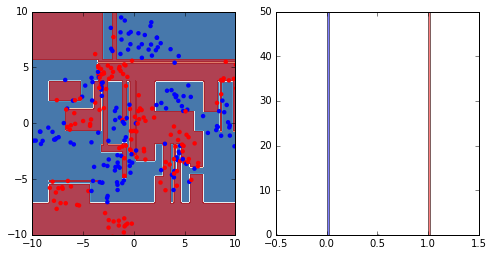

In [ ]:
from tutorial import plot_clf
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X, y)
plot_clf(clf, X, y)

### Random Forests

Idea: Build several decision trees with controlled randomness and average their decisions.

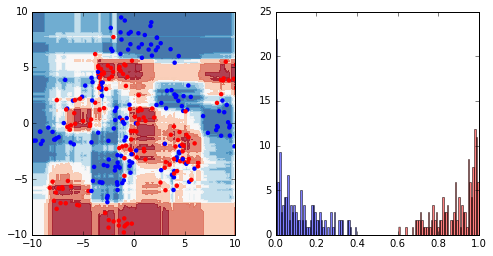

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500)
# from sklearn.ensemble import ExtraTreesClassifier
# clf = ExtraTreesClassifier(n_estimators=500)
clf.fit(X, y)
plot_clf(clf, X, y)

### Support vector machines

Idea: Find the hyperplane which has the largest distance to the nearest training points of any class.

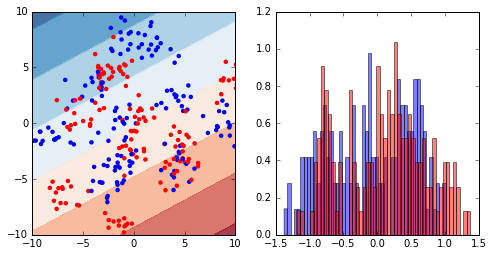

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")  # try kernel="rbf" instead
clf.fit(X, y)
plot_clf(clf, X, y)